In [0]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras import layers
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np

Using TensorFlow backend.


In [0]:
df = pd.read_csv('/content/Imputed_mastersheet - Mastersheet (3).csv')

In [0]:
df.head()

,Countries_fintechs,Master_Target,Country,Year,oneA,oneB,oneC,twoA,twoB,twoC,twoD,twoE,threeA,threeB,threeC,threeD,fourA,fourB,fiveA,fiveB,fiveC,sixA,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32
0,4.0,0.780624,Argentina,2018.0,2.447560,2.805120,4.061309,3.430802,4.195683,3.930331,4.613002,57.310511,2.805120,4.085398,3.137428,4.657785,78.050150,139.814600,3.377250,5.170746,31.000048,7.217,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,0.745056,Bangladesh,2018.0,2.578552,3.683762,4.117619,3.058403,3.355734,3.716894,4.730967,29.824851,3.683762,3.639965,3.037019,3.496264,30.039114,88.124059,3.109820,4.949509,35.176705,4.048,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,32.0,1.012724,Brazil,2018.0,2.459301,3.302393,4.566283,3.238514,4.296651,4.089989,4.598994,49.320929,3.302393,4.691751,2.703921,5.729115,90.236846,112.996557,3.782592,5.196036,22.598120,7.193,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,30.0,2.087412,Canada,2018.0,3.689212,4.582466,5.105235,4.659581,4.638758,4.652790,4.685475,33.428082,4.582466,6.227545,2.984595,6.519052,72.454314,85.895667,4.489319,6.075442,12.395334,7.292,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,0.181488,Chile,2018.0,3.504282,4.101409,3.883189,3.885442,3.263582,3.997062,4.922818,59.537574,4.101409,5.646328,3.370471,6.333855,88.247675,127.463286,3.518594,5.021656,41.484608,6.659,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
df = df.drop(['Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25','Unnamed: 26','Unnamed: 27','Unnamed: 28','Unnamed: 29','Unnamed: 30','Unnamed: 31','Unnamed: 32' ], axis=1)

In [0]:
df = df.iloc[0:170]

In [0]:
df.head()

,Countries_fintechs,Master_Target,Country,Year,oneA,oneB,oneC,twoA,twoB,twoC,twoD,twoE,threeA,threeB,threeC,threeD,fourA,fourB,fiveA,fiveB,fiveC,sixA
0,4.0,0.780624,Argentina,2018.0,2.447560,2.805120,4.061309,3.430802,4.195683,3.930331,4.613002,57.310511,2.805120,4.085398,3.137428,4.657785,78.050150,139.814600,3.377250,5.170746,31.000048,7.217
1,1.0,0.745056,Bangladesh,2018.0,2.578552,3.683762,4.117619,3.058403,3.355734,3.716894,4.730967,29.824851,3.683762,3.639965,3.037019,3.496264,30.039114,88.124059,3.109820,4.949509,35.176705,4.048
2,32.0,1.012724,Brazil,2018.0,2.459301,3.302393,4.566283,3.238514,4.296651,4.089989,4.598994,49.320929,3.302393,4.691751,2.703921,5.729115,90.236846,112.996557,3.782592,5.196036,22.598120,7.193
3,30.0,2.087412,Canada,2018.0,3.689212,4.582466,5.105235,4.659581,4.638758,4.652790,4.685475,33.428082,4.582466,6.227545,2.984595,6.519052,72.454314,85.895667,4.489319,6.075442,12.395334,7.292
4,1.0,0.181488,Chile,2018.0,3.504282,4.101409,3.883189,3.885442,3.263582,3.997062,4.922818,59.537574,4.101409,5.646328,3.370471,6.333855,88.247675,127.463286,3.518594,5.021656,41.484608,6.659


In [0]:
df.describe()

,Countries_fintechs,Master_Target,Year,oneA,oneB,oneC,twoA,twoB,twoC,twoD,twoE,threeA,threeB,threeC,threeD,fourA,fourB,fiveA,fiveB,fiveC,sixA
count,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000
mean,19.652941,1.085757,2013.500000,2.969593,4.563793,4.417471,3.633274,4.205251,4.891054,4.696211,40.385102,4.590673,4.481754,3.067720,5.234627,39.184886,98.270782,4.833535,5.433185,28.774142,7.766124
std,57.926526,0.875039,2.880767,0.730825,0.823135,0.629801,0.801486,1.014360,0.794884,0.483970,23.293090,0.877861,0.690610,0.630402,0.962540,27.664759,30.076030,0.903071,0.541235,11.263432,5.162838
min,0.000000,0.004488,2009.000000,1.745999,2.713680,2.922948,2.133738,1.557793,3.491420,2.994854,0.311554,2.713680,2.922948,1.672877,2.318407,0.190000,13.245200,3.021938,4.221145,1.847230,2.268000
25%,1.000000,0.263874,2011.000000,2.456115,3.927523,3.997338,3.118023,3.545780,4.238748,4.491938,21.821231,3.927523,4.011467,2.627982,4.610711,20.937568,80.658118,4.313511,5.035579,21.237750,4.302750
50%,3.000000,1.006338,2013.500000,2.831851,4.582860,4.452300,3.494668,4.101992,4.807732,4.801567,39.755819,4.576509,4.561109,3.078408,5.418257,32.584657,97.327554,4.717383,5.314801,27.842587,6.936000
75%,7.750000,1.707750,2016.000000,3.391992,5.081988,4.871723,4.189244,4.711361,5.482217,5.039411,53.873071,5.091494,4.902056,3.574284,5.823616,49.917824,120.284310,5.368047,5.808642,35.115279,9.091500
max,348.000000,3.021752,2018.000000,5.603143,6.406627,5.826403,5.773800,6.269771,6.576745,5.776374,87.360000,6.425532,6.308228,4.792845,6.817313,132.910286,173.840223,7.000000,6.743439,58.122132,27.327000


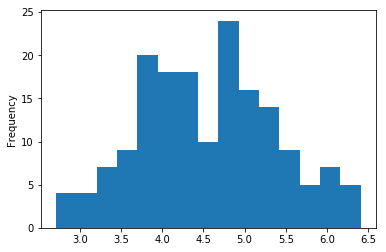

In [0]:
df['oneB'].plot(kind='hist',bins = 15, figsize = (6,4))

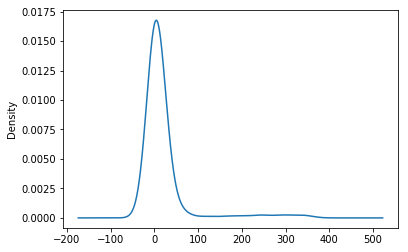

In [0]:
df['Countries_fintechs'].plot(kind='kde')

In [0]:
df.head()

,Countries_fintechs,Master_Target,Country,Year,oneA,oneB,oneC,twoA,twoB,twoC,twoD,twoE,threeA,threeB,threeC,threeD,fourA,fourB,fiveA,fiveB,fiveC,sixA
0,4.0,0.780624,Argentina,2018.0,2.447560,2.805120,4.061309,3.430802,4.195683,3.930331,4.613002,57.310511,2.805120,4.085398,3.137428,4.657785,78.050150,139.814600,3.377250,5.170746,31.000048,7.217
1,1.0,0.745056,Bangladesh,2018.0,2.578552,3.683762,4.117619,3.058403,3.355734,3.716894,4.730967,29.824851,3.683762,3.639965,3.037019,3.496264,30.039114,88.124059,3.109820,4.949509,35.176705,4.048
2,32.0,1.012724,Brazil,2018.0,2.459301,3.302393,4.566283,3.238514,4.296651,4.089989,4.598994,49.320929,3.302393,4.691751,2.703921,5.729115,90.236846,112.996557,3.782592,5.196036,22.598120,7.193
3,30.0,2.087412,Canada,2018.0,3.689212,4.582466,5.105235,4.659581,4.638758,4.652790,4.685475,33.428082,4.582466,6.227545,2.984595,6.519052,72.454314,85.895667,4.489319,6.075442,12.395334,7.292
4,1.0,0.181488,Chile,2018.0,3.504282,4.101409,3.883189,3.885442,3.263582,3.997062,4.922818,59.537574,4.101409,5.646328,3.370471,6.333855,88.247675,127.463286,3.518594,5.021656,41.484608,6.659


In [0]:

df['oneA_wv'] = df.oneA*.7
df['oneB_wv'] = df.oneB*.15
df['oneC_wv'] = df.oneC*.15
df['Master_one'] = df.oneA_wv + df.oneB_wv + df.oneC_wv

In [0]:
max_twoA = df['twoA'].max()
max_twoB = df['twoB'].max()
max_twoC = df['twoC'].max()
max_twoD = df['twoD'].max()
max_twoE = df['twoE'].max()


df['twoA_wv'] = (df.twoA/max_twoA)*.1
df['twoB_wv'] = (df.twoB/max_twoB)*.1
df['twoC_wv'] = (df.twoC/max_twoC)*.60
df['twoD_wv'] = (df.twoD/max_twoD)*.1
df['twoE_wv'] = (df.twoE/max_twoE)*.1

df['Master_two'] = df.twoA_wv + df.twoB_wv + df.twoC_wv + df.twoD_wv + df.twoE_wv

In [0]:
df.head()

,Countries_fintechs,Master_Target,Country,Year,oneA,oneB,oneC,twoA,twoB,twoC,twoD,twoE,threeA,threeB,threeC,threeD,fourA,fourB,fiveA,fiveB,fiveC,sixA,oneA_wv,oneB_wv,oneC_wv,Master_one,twoA_wv,twoB_wv,twoC_wv,twoD_wv,twoE_wv,Master_two
0,4.0,0.780624,Argentina,2018.0,2.447560,2.805120,4.061309,3.430802,4.195683,3.930331,4.613002,57.310511,2.805120,4.085398,3.137428,4.657785,78.050150,139.814600,3.377250,5.170746,31.000048,7.217,1.713292,0.420768,0.609196,2.743256,0.059420,0.066919,0.358566,0.079860,0.065603,0.630368
1,1.0,0.745056,Bangladesh,2018.0,2.578552,3.683762,4.117619,3.058403,3.355734,3.716894,4.730967,29.824851,3.683762,3.639965,3.037019,3.496264,30.039114,88.124059,3.109820,4.949509,35.176705,4.048,1.804987,0.552564,0.617643,2.975194,0.052970,0.053522,0.339094,0.081902,0.034140,0.561629
2,32.0,1.012724,Brazil,2018.0,2.459301,3.302393,4.566283,3.238514,4.296651,4.089989,4.598994,49.320929,3.302393,4.691751,2.703921,5.729115,90.236846,112.996557,3.782592,5.196036,22.598120,7.193,1.721511,0.495359,0.684942,2.901812,0.056090,0.068530,0.373132,0.079617,0.056457,0.633826
3,30.0,2.087412,Canada,2018.0,3.689212,4.582466,5.105235,4.659581,4.638758,4.652790,4.685475,33.428082,4.582466,6.227545,2.984595,6.519052,72.454314,85.895667,4.489319,6.075442,12.395334,7.292,2.582449,0.687370,0.765785,4.035604,0.080702,0.073986,0.424476,0.081114,0.038265,0.698544
4,1.0,0.181488,Chile,2018.0,3.504282,4.101409,3.883189,3.885442,3.263582,3.997062,4.922818,59.537574,4.101409,5.646328,3.370471,6.333855,88.247675,127.463286,3.518594,5.021656,41.484608,6.659,2.452997,0.615211,0.582478,3.650687,0.067294,0.052053,0.364654,0.085223,0.068152,0.637376


In [0]:



df['threeA_wv'] = df.threeA*.05
df['threeB_wv'] = df.threeB*.05
df['threeC_wv'] = df.threeC*.05
df['threeD_wv'] = df.threeD*.85
df['Master_three'] = df.threeA_wv + df.threeB_wv + df.threeC_wv + df.threeD_wv

In [0]:
df['Master_six'] = df.sixA

In [0]:
max_fourA = df['fourA'].max()
max_fourB = df['fourB'].max()


df['fourA_wv'] = (df.fourA/max_fourA)*.2
df['fourB_wv'] = (df.fourB/max_fourB)*.8
df['Master_four']= df.fourA_wv + df.fourB_wv


In [0]:
df.head()

,Countries_fintechs,Master_Target,Country,Year,oneA,oneB,oneC,twoA,twoB,twoC,twoD,twoE,threeA,threeB,threeC,threeD,fourA,fourB,fiveA,fiveB,fiveC,sixA,oneA_wv,oneB_wv,oneC_wv,Master_one,twoA_wv,twoB_wv,twoC_wv,twoD_wv,twoE_wv,Master_two,threeA_wv,threeB_wv,threeC_wv,threeD_wv,Master_three,Master_six,fourA_wv,fourB_wv,Master_four
0,4.0,0.780624,Argentina,2018.0,2.447560,2.805120,4.061309,3.430802,4.195683,3.930331,4.613002,57.310511,2.805120,4.085398,3.137428,4.657785,78.050150,139.814600,3.377250,5.170746,31.000048,7.217,1.713292,0.420768,0.609196,2.743256,0.059420,0.066919,0.358566,0.079860,0.065603,0.630368,0.140256,0.204270,0.156871,3.959118,4.460515,7.217,0.117448,0.643417,0.760864
1,1.0,0.745056,Bangladesh,2018.0,2.578552,3.683762,4.117619,3.058403,3.355734,3.716894,4.730967,29.824851,3.683762,3.639965,3.037019,3.496264,30.039114,88.124059,3.109820,4.949509,35.176705,4.048,1.804987,0.552564,0.617643,2.975194,0.052970,0.053522,0.339094,0.081902,0.034140,0.561629,0.184188,0.181998,0.151851,2.971825,3.489862,4.048,0.045202,0.405540,0.450743
2,32.0,1.012724,Brazil,2018.0,2.459301,3.302393,4.566283,3.238514,4.296651,4.089989,4.598994,49.320929,3.302393,4.691751,2.703921,5.729115,90.236846,112.996557,3.782592,5.196036,22.598120,7.193,1.721511,0.495359,0.684942,2.901812,0.056090,0.068530,0.373132,0.079617,0.056457,0.633826,0.165120,0.234588,0.135196,4.869748,5.404651,7.193,0.135786,0.520002,0.655788
3,30.0,2.087412,Canada,2018.0,3.689212,4.582466,5.105235,4.659581,4.638758,4.652790,4.685475,33.428082,4.582466,6.227545,2.984595,6.519052,72.454314,85.895667,4.489319,6.075442,12.395334,7.292,2.582449,0.687370,0.765785,4.035604,0.080702,0.073986,0.424476,0.081114,0.038265,0.698544,0.229123,0.311377,0.149230,5.541194,6.230925,7.292,0.109027,0.395286,0.504313
4,1.0,0.181488,Chile,2018.0,3.504282,4.101409,3.883189,3.885442,3.263582,3.997062,4.922818,59.537574,4.101409,5.646328,3.370471,6.333855,88.247675,127.463286,3.518594,5.021656,41.484608,6.659,2.452997,0.615211,0.582478,3.650687,0.067294,0.052053,0.364654,0.085223,0.068152,0.637376,0.205070,0.282316,0.168524,5.383777,6.039687,6.659,0.132793,0.586577,0.719370


In [0]:
df['Master_four'].describe()

count    170.000000
mean       0.511199
std        0.155233
min        0.088559
25%        0.419611
50%        0.503997
75%        0.621360
max        0.943935
Name: Master_four, dtype: float64

In [0]:
max_fiveA = df['fiveA'].max()
max_fiveB = df['fiveB'].max()
max_fiveC = df['fiveC'].max()



df['fiveA_wv'] = (df.fiveA/max_fiveA)*.9
df['fiveB_wv'] = (df.fiveB/max_fiveB)*.05
df['fiveC_wv'] = (df.fiveC/max_fiveC)*.05
df['Master_five']= df.fiveA_wv + df.fiveB_wv + df.fiveC_wv

In [0]:
df['Master_five'].describe()

count    170.000000
mean       0.686493
std        0.115649
min        0.453352
25%        0.617133
50%        0.665717
75%        0.764858
max        0.961853
Name: Master_five, dtype: float64

In [0]:
df.head()

,Countries_fintechs,Master_Target,Country,Year,oneA,oneB,oneC,twoA,twoB,twoC,twoD,twoE,threeA,threeB,threeC,threeD,fourA,fourB,fiveA,fiveB,fiveC,sixA,oneA_wv,oneB_wv,oneC_wv,Master_one,twoA_wv,twoB_wv,twoC_wv,twoD_wv,twoE_wv,Master_two,threeA_wv,threeB_wv,threeC_wv,threeD_wv,Master_three,Master_six,fourA_wv,fourB_wv,Master_four,fiveA_wv,fiveB_wv,fiveC_wv,Master_five
0,4.0,0.780624,Argentina,2018.0,2.447560,2.805120,4.061309,3.430802,4.195683,3.930331,4.613002,57.310511,2.805120,4.085398,3.137428,4.657785,78.050150,139.814600,3.377250,5.170746,31.000048,7.217,1.713292,0.420768,0.609196,2.743256,0.059420,0.066919,0.358566,0.079860,0.065603,0.630368,0.140256,0.204270,0.156871,3.959118,4.460515,7.217,0.117448,0.643417,0.760864,0.434218,0.038339,0.026668,0.499225
1,1.0,0.745056,Bangladesh,2018.0,2.578552,3.683762,4.117619,3.058403,3.355734,3.716894,4.730967,29.824851,3.683762,3.639965,3.037019,3.496264,30.039114,88.124059,3.109820,4.949509,35.176705,4.048,1.804987,0.552564,0.617643,2.975194,0.052970,0.053522,0.339094,0.081902,0.034140,0.561629,0.184188,0.181998,0.151851,2.971825,3.489862,4.048,0.045202,0.405540,0.450743,0.399834,0.036699,0.030261,0.466794
2,32.0,1.012724,Brazil,2018.0,2.459301,3.302393,4.566283,3.238514,4.296651,4.089989,4.598994,49.320929,3.302393,4.691751,2.703921,5.729115,90.236846,112.996557,3.782592,5.196036,22.598120,7.193,1.721511,0.495359,0.684942,2.901812,0.056090,0.068530,0.373132,0.079617,0.056457,0.633826,0.165120,0.234588,0.135196,4.869748,5.404651,7.193,0.135786,0.520002,0.655788,0.486333,0.038527,0.019440,0.544300
3,30.0,2.087412,Canada,2018.0,3.689212,4.582466,5.105235,4.659581,4.638758,4.652790,4.685475,33.428082,4.582466,6.227545,2.984595,6.519052,72.454314,85.895667,4.489319,6.075442,12.395334,7.292,2.582449,0.687370,0.765785,4.035604,0.080702,0.073986,0.424476,0.081114,0.038265,0.698544,0.229123,0.311377,0.149230,5.541194,6.230925,7.292,0.109027,0.395286,0.504313,0.577198,0.045047,0.010663,0.632908
4,1.0,0.181488,Chile,2018.0,3.504282,4.101409,3.883189,3.885442,3.263582,3.997062,4.922818,59.537574,4.101409,5.646328,3.370471,6.333855,88.247675,127.463286,3.518594,5.021656,41.484608,6.659,2.452997,0.615211,0.582478,3.650687,0.067294,0.052053,0.364654,0.085223,0.068152,0.637376,0.205070,0.282316,0.168524,5.383777,6.039687,6.659,0.132793,0.586577,0.719370,0.452391,0.037234,0.035687,0.525312


In [0]:
df_weights = df.loc[:,('Master_Target','Master_one','Master_two', 'Master_three', 'Master_four','Master_five','Master_six')]

In [0]:
df_weights.head()

,Master_Target,Master_one,Master_two,Master_three,Master_four,Master_five,Master_six
0,0.780624,2.743256,0.630368,4.460515,0.760864,0.499225,7.217
1,0.745056,2.975194,0.561629,3.489862,0.450743,0.466794,4.048
2,1.012724,2.901812,0.633826,5.404651,0.655788,0.544300,7.193
3,2.087412,4.035604,0.698544,6.230925,0.504313,0.632908,7.292
4,0.181488,3.650687,0.637376,6.039687,0.719370,0.525312,6.659


In [0]:
df_weights.describe()

,Master_Target,Master_one,Master_two,Master_three,Master_four,Master_five,Master_six
count,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000
mean,1.085757,3.425905,0.703741,5.056441,0.511199,0.686493,7.766124
std,0.875039,0.647803,0.110943,0.887028,0.155233,0.115649,5.162838
min,0.004488,2.129635,0.491144,2.429936,0.088559,0.453352,2.268000
25%,0.263874,2.950288,0.629811,4.468750,0.419611,0.617133,4.302750
50%,1.006338,3.329493,0.683200,5.229837,0.503997,0.665717,6.936000
75%,1.707750,3.872461,0.738962,5.611992,0.621360,0.764858,9.091500
max,3.021752,5.538268,0.959448,6.560698,0.943935,0.961853,27.327000


In [0]:
df_weights.describe()

,Master_Target,Master_one,Master_two,Master_three,Master_four,Master_five,Master_six
count,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000
mean,1.085757,3.425905,0.703741,5.056441,0.511199,0.686493,7.766124
std,0.875039,0.647803,0.110943,0.887028,0.155233,0.115649,5.162838
min,0.004488,2.129635,0.491144,2.429936,0.088559,0.453352,2.268000
25%,0.263874,2.950288,0.629811,4.468750,0.419611,0.617133,4.302750
50%,1.006338,3.329493,0.683200,5.229837,0.503997,0.665717,6.936000
75%,1.707750,3.872461,0.738962,5.611992,0.621360,0.764858,9.091500
max,3.021752,5.538268,0.959448,6.560698,0.943935,0.961853,27.327000


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import preprocessing

In [0]:
df_processed = preprocessing.StandardScaler().fit_transform(df_weights)

In [0]:
df_processed.head()

AttributeError: ignored

In [0]:
df_processed = pd.DataFrame(df_processed)

In [0]:
df_processed.columns = ['Master_Target', 'Master_one','Master_two','Master_three','Master_four','Master_five','Master_six']

In [0]:
df_processed.head()

,Master_Target,Master_one,Master_two,Master_three,Master_four,Master_five,Master_six
0,-0.349738,-1.056903,-0.663309,-0.673808,1.613076,-1.624059,-0.106675
1,-0.390505,-0.697809,-1.284726,-1.771316,-0.390609,-1.905316,-0.722298
2,-0.083709,-0.811421,-0.632051,0.393718,0.934181,-1.233151,-0.111337
3,1.148079,0.943960,-0.046983,1.327978,-0.044493,-0.464703,-0.092105
4,-1.036457,0.348016,-0.599952,1.111748,1.344979,-1.397824,-0.215074


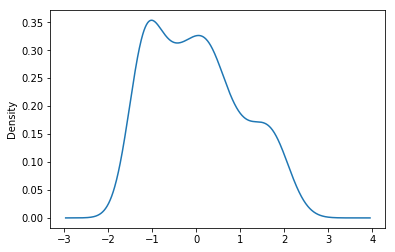

In [0]:
df_processed['Master_Target'].plot(kind='kde')

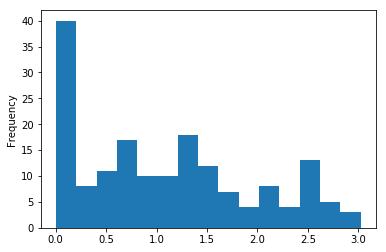

In [0]:
df['Master_Target'].plot(kind='hist',bins = 15, figsize = (6,4))

In [0]:
df_processed.describe()

,Master_Target,Master_one,Master_two,Master_three,Master_four,Master_five,Master_six
count,1.700000e+02,1.700000e+02,1.700000e+02,1.700000e+02,1.700000e+02,1.700000e+02,1.700000e+02
mean,1.345329e-16,2.533921e-16,1.253899e-16,5.498869e-16,3.608225e-16,4.649875e-16,9.992007e-17
std,1.002954e+00,1.002954e+00,1.002954e+00,1.002954e+00,1.002954e+00,1.002954e+00,1.002954e+00
min,-1.239331e+00,-2.006937e+00,-1.921928e+00,-2.969766e+00,-2.730663e+00,-2.021888e+00,-1.068088e+00
25%,-9.420275e-01,-7.363685e-01,-6.683470e-01,-6.644969e-01,-5.917480e-01,-6.015174e-01,-6.728093e-01
50%,-9.102850e-02,-1.492681e-01,-1.856960e-01,1.960577e-01,-4.653714e-02,-1.801731e-01,-1.612632e-01
75%,7.129175e-01,6.913757e-01,3.184062e-01,6.281572e-01,7.117465e-01,6.796194e-01,2.574732e-01
max,2.219003e+00,3.270443e+00,2.311652e+00,1.700850e+00,2.795885e+00,2.388033e+00,3.799977e+00


In [0]:
normalizer = preprocessing.Normalizer().fit(df_processed) 
normalizer

Normalizer(copy=True, norm='l2')

In [0]:
normalizer = normalizer.transform(df_processed) 

In [0]:
df_normalized = pd.DataFrame(normalizer)

In [0]:
df_normalized.columns = ['Master_Target', 'Master_one','Master_two','Master_three','Master_four','Master_five','Master_six']

In [0]:
df_normalized.describe()

,Master_Target,Master_one,Master_two,Master_three,Master_four,Master_five,Master_six
count,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000
mean,-0.035363,-0.039938,-0.027425,0.018928,-0.020067,-0.024902,-0.023457
std,0.405696,0.373298,0.353210,0.390303,0.385002,0.383123,0.352580
min,-0.796123,-0.784726,-0.653000,-0.854506,-0.814434,-0.855128,-0.725385
25%,-0.394860,-0.349482,-0.302073,-0.281068,-0.323934,-0.277682,-0.295066
50%,-0.045881,-0.083153,-0.098409,0.097145,-0.017768,-0.077127,-0.070114
75%,0.275142,0.311096,0.178392,0.353097,0.307789,0.288469,0.109393
max,0.811511,0.846386,0.724413,0.730769,0.850500,0.693979,0.924303


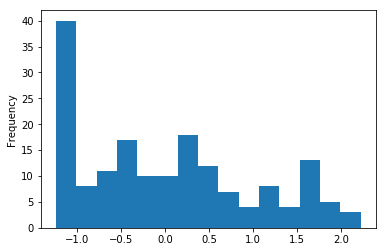

In [0]:
df_processed['Master_Target'].plot(kind='hist',bins = 15, figsize = (6,4))

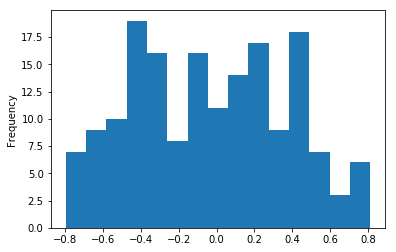

In [0]:
df_normalized['Master_Target'].plot(kind='hist',bins = 15, figsize = (6,4))

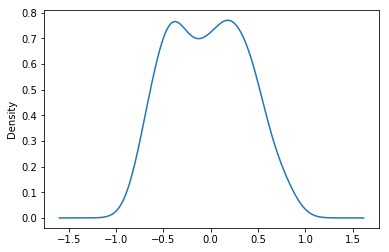

In [0]:
df_normalized['Master_Target'].plot(kind='kde')

This is a correlation teste

In [0]:
df_normalized.corr(method ='pearson') 

,Master_Target,Master_one,Master_two,Master_three,Master_four,Master_five,Master_six
Master_Target,1.000000,0.222047,0.369964,0.220902,0.243976,0.345109,-0.069661
Master_one,0.222047,1.000000,0.459184,0.385297,-0.084341,0.269466,-0.121491
Master_two,0.369964,0.459184,1.000000,0.422635,0.082841,0.465691,-0.115146
Master_three,0.220902,0.385297,0.422635,1.000000,-0.150941,0.134943,0.163930
Master_four,0.243976,-0.084341,0.082841,-0.150941,1.000000,-0.224944,0.127224
Master_five,0.345109,0.269466,0.465691,0.134943,-0.224944,1.000000,-0.073717
Master_six,-0.069661,-0.121491,-0.115146,0.163930,0.127224,-0.073717,1.000000


In [0]:

from scipy.stats import pearsonr
target_col, hyp_1 =  df_normalized['Master_Target'], df_normalized['Master_one']
corr, p = pearsonr(target_col, hyp_1)
h1p = p
h1p

0.0036119590348296583

In [0]:
target_col, hyp_2 =  df_normalized['Master_Target'], df_normalized['Master_two']
corr, p = pearsonr(target_col, hyp_2)
h2p = p
h2p

6.853359914525474e-07

In [0]:
target_col, hyp_3 =  df_normalized['Master_Target'], df_normalized['Master_three']
corr, p = pearsonr(target_col, hyp_3)
h3p = p
h3p

0.0037939778863726285

In [0]:
target_col, hyp_4 =  df_normalized['Master_Target'], df_normalized['Master_four']
corr, p = pearsonr(target_col, hyp_4)
h4p = p
h4p

0.0013451107528966845

In [0]:
target_col, hyp_5 =  df_normalized['Master_Target'], df_normalized['Master_five']
corr, p = pearsonr(target_col, hyp_5)
h5p = p
h5p

4.048732405146512e-06

In [0]:
target_col, hyp_6 =  df_normalized['Master_Target'], df_normalized['Master_six']
corr, p = pearsonr(target_col, hyp_6)
h6p = p
h6p

0.36670197527077153

In [0]:
df = pd.read_csv('/content/Mastersheet_part2 - LATAM_imputed.csv')

In [0]:
df.head(7)

,Countries_fintechs,CB_Ranking,Country,Year,oneA,oneB,oneC,twoA,twoB,twoC,twoD,twoE,threeA,threeB,threeC,threeD,fourA,fourB,fiveA,fiveB,sixA
0,4,229,Argentina,2018,2.447560,2.805120,4.061309,3.430802,4.195683,3.930331,4.613002,57.310511,2.805120,4.085398,3.137428,4.657785,78.050150,139.814600,3.377250,5.170746,7.217
1,32,300,Brazil,2018,2.459301,3.302393,4.566283,3.238514,4.296651,4.089989,4.598994,49.320929,3.302393,4.691751,2.703921,5.729115,90.236846,112.996557,3.782592,5.196036,7.193
2,1,424,Chile,2018,3.504282,4.101409,3.883189,3.885442,3.263582,3.997062,4.922818,59.537574,4.101409,5.646328,3.370471,6.333855,88.247675,127.463286,3.518594,5.021656,6.659
3,7,175,Colombia,2018,2.886229,3.680098,3.975811,3.878223,4.121078,3.735612,5.138438,62.330840,3.680098,4.784922,3.613748,5.579168,48.799955,126.813882,3.503555,5.061698,9.740
4,6,176,Mexico,2018,3.152481,3.589537,4.556806,3.626325,4.125878,4.043954,4.907667,35.623955,3.589537,4.973308,3.131883,5.523331,63.613795,88.513427,3.480606,5.331116,4.887
5,1,316,Bolivia,2018,2.150270,3.869697,4.496598,3.345480,8.600000,5.479362,5.810134,39.697515,3.869697,3.641765,2.110431,5.172404,42.750051,124.482456,5.514688,5.670127,3.258
6,2,153,Ecuador,2018,2.353610,3.398379,4.410720,3.717029,8.684220,5.231868,5.668363,54.062925,3.398379,3.817946,2.485291,5.254246,56.903876,141.149951,4.820285,5.415654,3.910
